#                                     Project :1 Mercedes-Benz Greener Manufacturing

### DESCRIPTION

Reduce the time a Mercedes-Benz spends on the test bench.

Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

##### Following actions should be performed:¶
- If for any column(s), the variance is equal to zero, then you need to remove those variable(s).
- Check for null and unique values for test and train sets.
- Apply label encoder.
- Perform dimensionality reduction.
- Predict your test_df values using XGBoost.

In [1]:
# Importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Loading the train/test data
# The lowercase alphabets are categorical variables
train = pd.read_csv('train.csv')
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print('Size of training set')
print(train.shape)

Size of training set
(4209, 378)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [5]:
# Separating y column as this is for prediction output
y_train = train['y'].values
y_train

array([130.81,  88.53,  76.26, ..., 109.22,  87.48, 110.85])

In [6]:
# A lot of columns that have an X 
# Let's check for the same 
# 376 features with X
colums_x = [c for c in train.columns if 'X' in c]

# info about colums_x
print(len(colums_x))
print(train[colums_x].dtypes.value_counts())

376
int64     368
object      8
dtype: int64


In [7]:
# Looking at the test dataset for similar features
test = pd.read_csv('test.csv')
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [8]:
print('Size of training set')
test.shape

Size of training set


(4209, 377)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [10]:
# Creating the final dataset
# Removing unwanted columns (ID); y has been removed earlier
final_column = list(set(train.columns) - set(['ID', 'y']))

x_train = train[final_column]
# x_train
x_test = test[final_column]
# x_test

In [11]:
# Searching for null values
# Creating a function for the same
def detect(df):
    if df.isnull().any().any():
        print("Yes")
    else:
        print("No")

detect(x_train)
detect(x_test)

# Observation : There are no missing values.

No
No


In [12]:
## EDA
# Integer Columns Analysis
unique_value_dict = {}
for col in x_train.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(x_train[col].unique()).tolist())
        t_list = unique_value_dict.get(unique_value, [])
        t_list.append(col)
        unique_value_dict[unique_value] = t_list[:]
for unique_val, columns in unique_value_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("-----------------------------------------------------------")

Columns containing the unique values :  [0]
['X289', 'X297', 'X347', 'X268', 'X11', 'X233', 'X93', 'X290', 'X235', 'X293', 'X330', 'X107']
-----------------------------------------------------------
Columns containing the unique values :  [0, 1]
['X12', 'X105', 'X138', 'X145', 'X130', 'X58', 'X273', 'X382', 'X84', 'X160', 'X71', 'X230', 'X317', 'X91', 'X62', 'X103', 'X172', 'X372', 'X257', 'X16', 'X53', 'X204', 'X307', 'X17', 'X56', 'X251', 'X183', 'X308', 'X321', 'X19', 'X368', 'X151', 'X247', 'X70', 'X256', 'X352', 'X10', 'X29', 'X15', 'X125', 'X157', 'X119', 'X181', 'X360', 'X202', 'X41', 'X269', 'X21', 'X118', 'X266', 'X123', 'X341', 'X278', 'X82', 'X87', 'X229', 'X319', 'X95', 'X342', 'X320', 'X267', 'X227', 'X37', 'X366', 'X191', 'X271', 'X262', 'X363', 'X311', 'X164', 'X135', 'X137', 'X32', 'X114', 'X310', 'X46', 'X305', 'X163', 'X241', 'X362', 'X50', 'X192', 'X313', 'X35', 'X376', 'X365', 'X27', 'X33', 'X210', 'X242', 'X240', 'X170', 'X244', 'X309', 'X339', 'X351', 'X299', 'X13

In [13]:
# Removal of columns with a variance of 0
# means columns that have only one unique value 0. 

for column in final_column:
    check = len(np.unique(x_train[column]))
    if check == 1:
        x_train.drop(column, axis = 1, inplace=True) 
        x_test.drop(column, axis = 1, inplace=True)

x_train.head()

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,X12,X105,X138,X145,X130,X58,X273,X382,X84,X160,...,X304,X248,X55,X291,X300,X280,X259,X358,X203,X69
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,1,1,1,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,1,0,...,1,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [14]:
## Label encoding the Categorical columns
from sklearn import preprocessing
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_train[f].values)) 
        x_train[f] = lbl.transform(list(x_train[f].values))
        #x_test[f] = lbl.transform(list(x_test[f].values))   ## as values in test dataset differs from train set

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


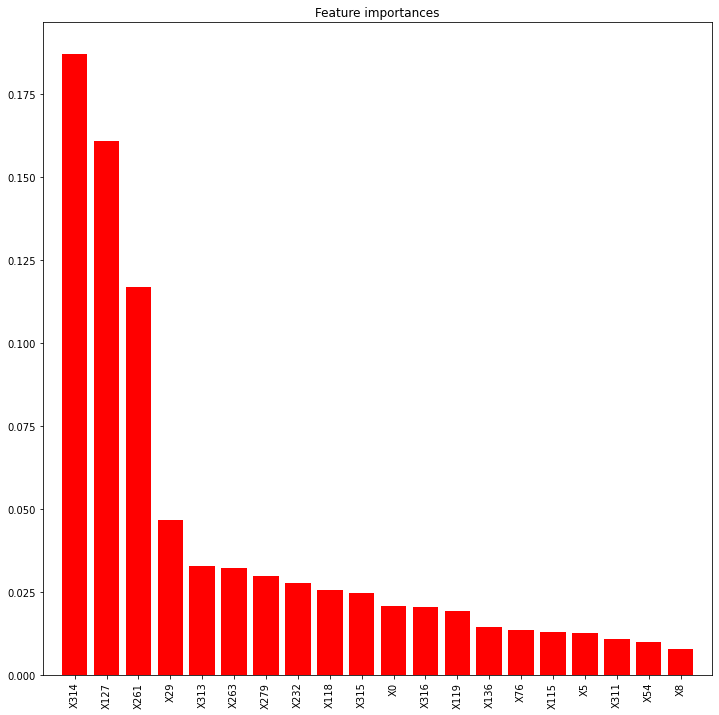

In [15]:
## Let us build a Random Forest model and check the important variables.

from sklearn import ensemble
model = ensemble.RandomForestRegressor(n_estimators=200, 
                                       max_depth=10, min_samples_leaf=4, 
                                       max_features=0.2, n_jobs=-1, 
                                       random_state=0)
model.fit(x_train, y_train)
feat_names = x_train.columns.values

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [16]:
# Performing dimensionality reduction with principal components analysis
from sklearn.decomposition import PCA
n_comp = 12
pca = PCA(n_components = n_comp, random_state = 42)
pca_result_train = pca.fit_transform(x_train)
##pca_result_test = pca.transform(x_test)


In [17]:
# ML Modeling with XGboost
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Splitting the data by 80/20
x_train, x_valid, y_train, y_valid = train_test_split(pca_result_train, 
                                                      y_train, 
                                                      test_size = 0.2, 
                                                      random_state = 42)

In [18]:
# Building the final feature set
f_train = xgb.DMatrix(x_train, label = y_train)
f_valid = xgb.DMatrix(x_valid, label = y_valid)

#f_test = xgb.DMatrix(pca_result_test)

In [19]:
# Setting the parameters for XGB
params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02  ## eta means learning rate
params['max_depth'] = 4

In [20]:
# Predicting the score
# Creating a function for the same

def scorer(m, w):
    labels = w.get_label()
    return 'r2', r2_score(labels, m)

final_set = [(f_train, 'train'), (f_valid, 'valid')]

P = xgb.train(params, f_train, 1000, final_set, early_stopping_rounds=50, feval=scorer, maximize=True, verbose_eval=10)

[18:54:07] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.99704	valid-rmse:98.88675	train-r2:-59.49743	valid-r2:-61.82424
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:81.14532	valid-rmse:81.05431	train-r2:-39.64615	valid-r2:-41.20883
[20]	train-rmse:66.60017	valid-rmse:66.52771	train-r2:-26.38061	valid-r2:-27.43520
[30]	train-rmse:54.76085	valid-rmse:54.72092	train-r2:-17.51112	valid-r2:-18.23791
[40]	train-rmse:45.14307	valid-rmse:45.11907	train-r2:-11.57983	valid-r2:-12.07891
[50]	train-rmse:37.35343	valid-rmse:37.35661	train-r2:-7.61298	valid-r2:-7.96573
[60]	train-rmse:31.07077	valid-rmse:31.08922	train-r2:-4.95932	valid-r2:-5.20970
[70]	train-rmse:26.02810	valid-rmse:26.04551	train-r2:-3.18194	valid-r2:-3.35830
[80]	train-rmse:22.00455	valid-rmse:22.02653	train-r2:-1.98894	valid-r2:-2.

In [21]:
# Predicting on test set
#p_test = P.predict(f_test)
p_test = P.predict(f_valid)
p_test

array([ 92.17528 ,  97.483574, 103.38218 ,  79.2522  , 112.003845,
       102.13434 ,  92.82942 , 102.456314, 104.021225, 114.339226,
        76.88794 ,  96.12975 ,  97.10802 , 102.9415  ,  96.13532 ,
        95.83807 , 109.490135,  96.56069 ,  94.99354 , 116.205025,
       115.389465,  97.27527 ,  95.18498 , 101.07877 ,  93.07377 ,
       111.390076,  95.093124,  77.624466,  93.42783 ,  94.439445,
        94.7696  , 102.03972 ,  97.1599  , 109.185616,  98.7584  ,
       114.690994, 112.80287 ,  99.131454,  92.3585  ,  98.2027  ,
       115.551575, 102.23925 , 120.84752 , 108.48048 ,  96.0504  ,
       102.07816 ,  92.21762 , 104.04298 , 109.542854, 104.25829 ,
        94.56043 ,  99.15913 , 103.83048 , 107.17763 , 100.162506,
       100.99298 ,  98.81897 , 111.41354 ,  96.10733 ,  97.2599  ,
       108.9856  ,  76.62812 ,  95.090416,  95.47149 ,  77.53354 ,
        98.45336 ,  94.81423 , 101.06648 , 104.25829 ,  99.21214 ,
        93.896675,  94.87547 ,  98.78808 , 106.288025,  95.709

In [22]:
Predicted_Data = pd.DataFrame()
Predicted_Data['y'] = p_test
Predicted_Data.head()

,y
0,92.175278
1,97.483574
2,103.382179
3,79.252197
4,112.003845
